# Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

## Import the necessary libraries and briefly explain the use of each library

In [30]:
%pip install numpy
%pip install pandas
%pip install pyspark
%pip install seaborn
%pip install matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Explanation

## Read the given dataset

In [58]:
#pima = pd.read_csv("./diabetes.csv")

# Import necessary libraries
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

# Define the storage account details
storage_account_name = "<redacted>"
storage_account_key = "<redacted>"
container_name = "<redacted>"
file_path = "pima/diabetes.csv"

# Set the Spark configuration for accessing the storage account
spark.conf.set(f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net", storage_account_key)

# Read the CSV file from Azure Blob Storage
pima = spark.read.csv(f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/{file_path}", header=True, inferSchema=True)
pima = pima.toPandas()

ModuleNotFoundError: No module named 'pyspark'

## Show the last 10 records of the dataset. How many columns are there?

In [32]:
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### The Answer here: 


## Show the first 10 records of the dataset

In [33]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## What do you understand by the dimension of the dataset? Find the dimension of the `pima` dataframe.

In [34]:
pima.shape

(768, 9)

#### Answer: 


## What do you understand by the size of the dataset? Find the size of the `pima` dataframe.

In [35]:
pima.size

6912

#### Answer here: 


## What are the data types of all the variables in the data set?
**Hint: Use info() function to get all the information about the dataset.**

In [36]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Answer here: 


## What do you mean by missing values? Are there any missing values in the `pima` dataframe?

In [37]:
pima.isnull().values.any()

np.False_

#### Answer here: 


## What does summary statistics of data represents? Find the summary statistics for all variables except 'Outcome' in the `pima` data? Take one column/variable from the output table and explain all the statistical measures.

In [38]:
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### Answer here: 


## Plot the distribution plot for the variable 'BloodPressure'. Write detailed observations from the plot.

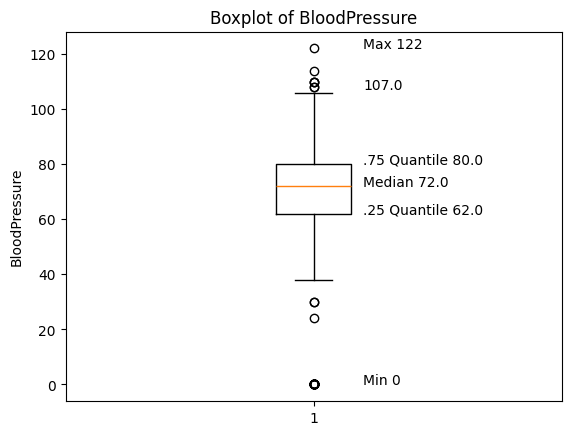

In [39]:
plt.boxplot(pima['BloodPressure'])

plt.title('Boxplot of BloodPressure')
plt.ylabel('BloodPressure')
plt.text(x=1.1,y=pima['BloodPressure'].min(),s='Min %s'%(pima['BloodPressure'].min()))
plt.text(x=1.1,y=pima['BloodPressure'].quantile(0.25),s='.25 Quantile %s'%(pima['BloodPressure'].quantile(0.25)))
plt.text(x=1.1,y=pima['BloodPressure'].median(),s='Median %s'%(pima['BloodPressure'].median()))
plt.text(x=1.1,y=pima['BloodPressure'].quantile(0.75),s='.75 Quantile %s'%(pima['BloodPressure'].quantile(0.75)))
plt.text(x=1.1,y=pima['BloodPressure'].quantile(0.75)+((pima['BloodPressure'].quantile(0.75)-pima['BloodPressure'].quantile(0.25))*1.5),s='%s'%(pima['BloodPressure'].quantile(0.75)+((pima['BloodPressure'].quantile(0.75)-pima['BloodPressure'].quantile(0.25))*1.5)))
plt.text(x=1.1,y=pima['BloodPressure'].max(),s='Max %s'%(pima['BloodPressure'].max()))
plt.show()

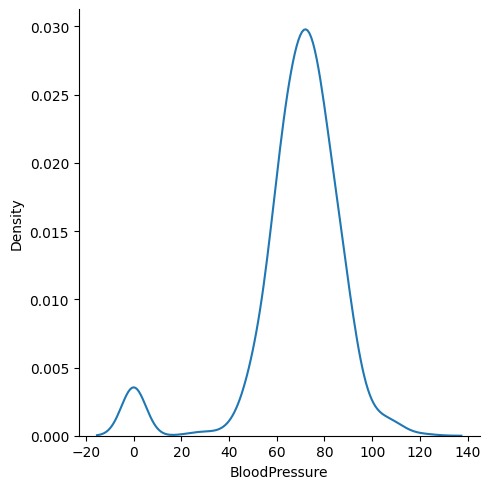

In [40]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

#### Answer here: 


## What is the 'BMI' for the person having the highest 'Glucose'?

In [41]:
pima[pima['Glucose']==pima['Glucose'].max()].BMI

661    42.9
Name: BMI, dtype: float64

#### Answer here: 


### What is the mean of the variable 'BMI'? 
### What is the median of the variable 'BMI'? 
### What is the mode of the variable 'BMI'?
### Are the three measures of central tendency equal?

In [42]:
print(pima['BMI'])
m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64
31.992578124999998
32.0
32.0


#### Answer here: 


## How many women's 'Glucose' level is above the mean level of 'Glucose'?

In [43]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

349

#### Answer here: 


## How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'?

In [44]:
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())].shape[0]

22

#### Answer here: 


## Create the pairplot for variables 'Glucose', 'SkinThickness' and 'DiabetesPedigreeFunction'. Write you observations from the plot.

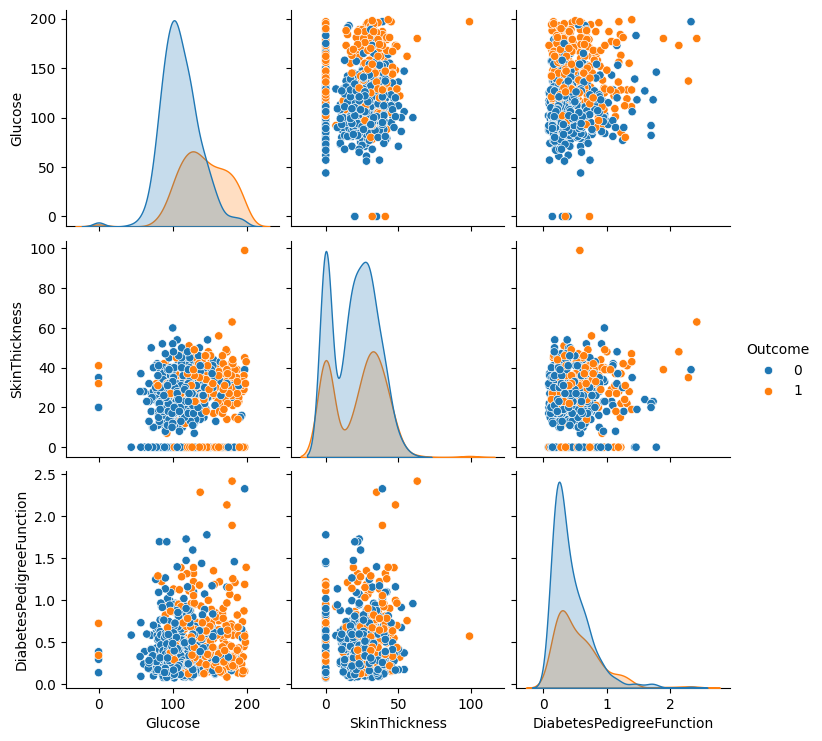

In [45]:
g=sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
#g = g.map_diag(plt.hist)
plt.show()

#### Answer here: 


## Plot the scatterplot between 'Glucose' and 'Insulin'. Write your observations from the plot.

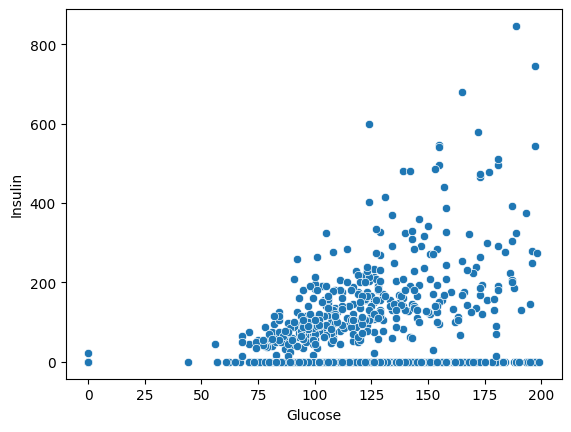

In [46]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

#### Answer here: 


## Plot the boxplot for the 'Age' variable. Are there outliers?

In [47]:
pima['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [48]:
q1 = pima['Age'].quantile(0.25)
q3 = pima['Age'].quantile(0.75)
topwhisker=q3+((q3-q1)*1.5)
pima[pima['Age'] > topwhisker].shape

(9, 9)

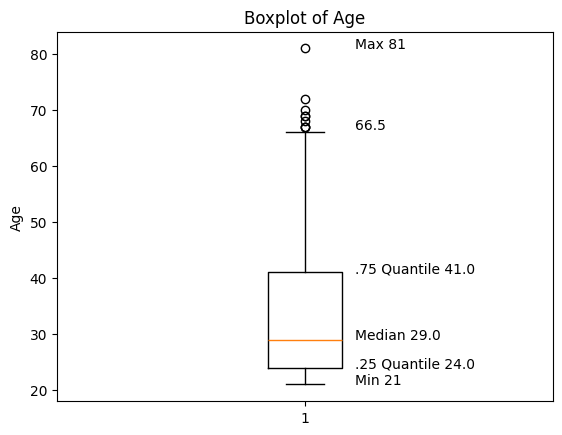

In [49]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.text(x=1.1,y=pima['Age'].min(),s='Min %s'%(pima['Age'].min()))
plt.text(x=1.1,y=pima['Age'].quantile(0.25),s='.25 Quantile %s'%(pima['Age'].quantile(0.25)))
plt.text(x=1.1,y=pima['Age'].median(),s='Median %s'%(pima['Age'].median()))
plt.text(x=1.1,y=pima['Age'].quantile(0.75),s='.75 Quantile %s'%(pima['Age'].quantile(0.75)))
plt.text(x=1.1,y=pima['Age'].quantile(0.75)+((pima['Age'].quantile(0.75)-pima['Age'].quantile(0.25))*1.5),s='%s'%(pima['Age'].quantile(0.75)+((pima['Age'].quantile(0.75)-pima['Age'].quantile(0.25))*1.5)))
plt.text(x=1.1,y=pima['Age'].max(),s='Max %s'%(pima['Age'].max()))
plt.show()

#### Answer here: 


## Plot histograms for variable Age to understand the number of women in different Age groups given that they have diabetes or not. Explain both histograms and compare them.

In [50]:
pima.describe()
#g=sns.pairplot(data=pima,vars=['Age', 'Outcome'], hue='Outcome')
#plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


[0.04958767 0.01931424 0.0093316  0.00455729 0.00054253]


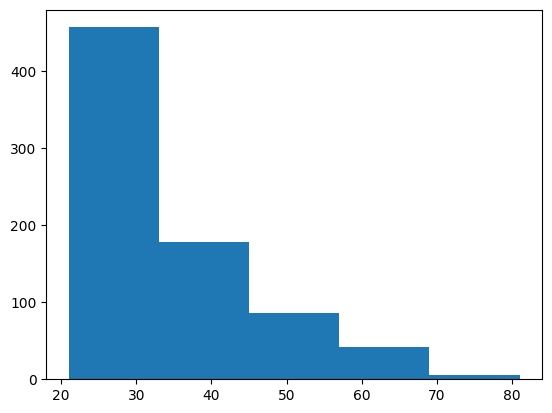

In [51]:
plt.hist(pima['Age'], bins = 5)
hist, _ = np.histogram(pima['Age'], bins=5, density=True)
print(hist)


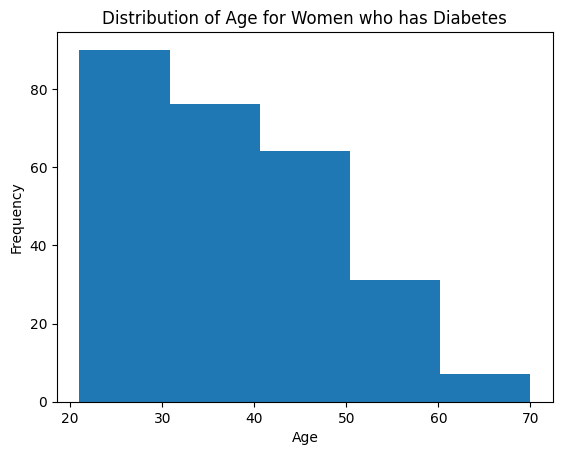

In [52]:
bins=5
plt.hist(pima[pima['Outcome']==1]['Age'], bins = bins)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

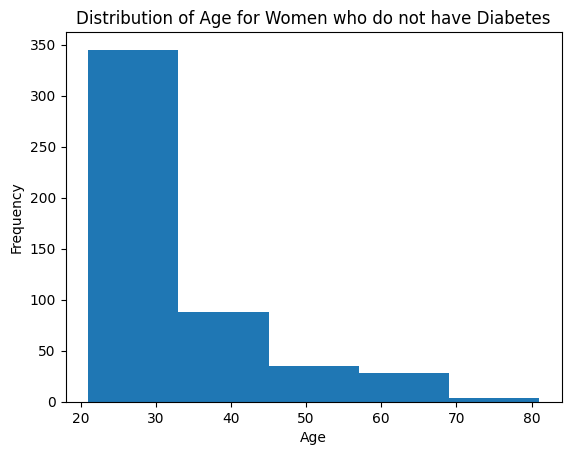

In [53]:
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Answer here: 


<Axes: xlabel='Age', ylabel='Outcome'>

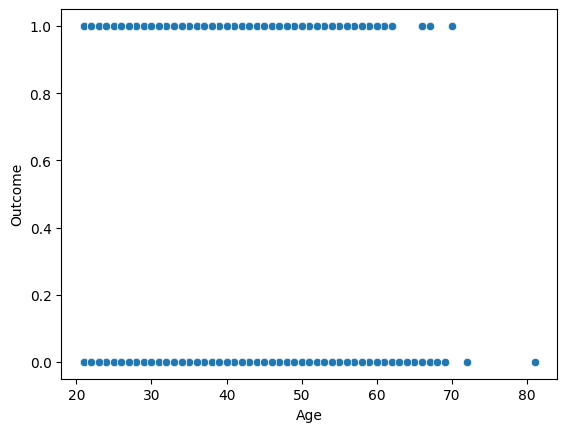

In [54]:
df=pima[['Age', 'Outcome']]
sns.scatterplot(data=df, x="Age", y="Outcome")

## What is Inter Quartile Range of all the variables? Why is it used? Which plot visualizes the same?

In [55]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


#### Answer here: 


## Find and visualize the the correlation matrix. Write your observations from the plot.

In [56]:
corr_matrix = pima.iloc[:,0:8].corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


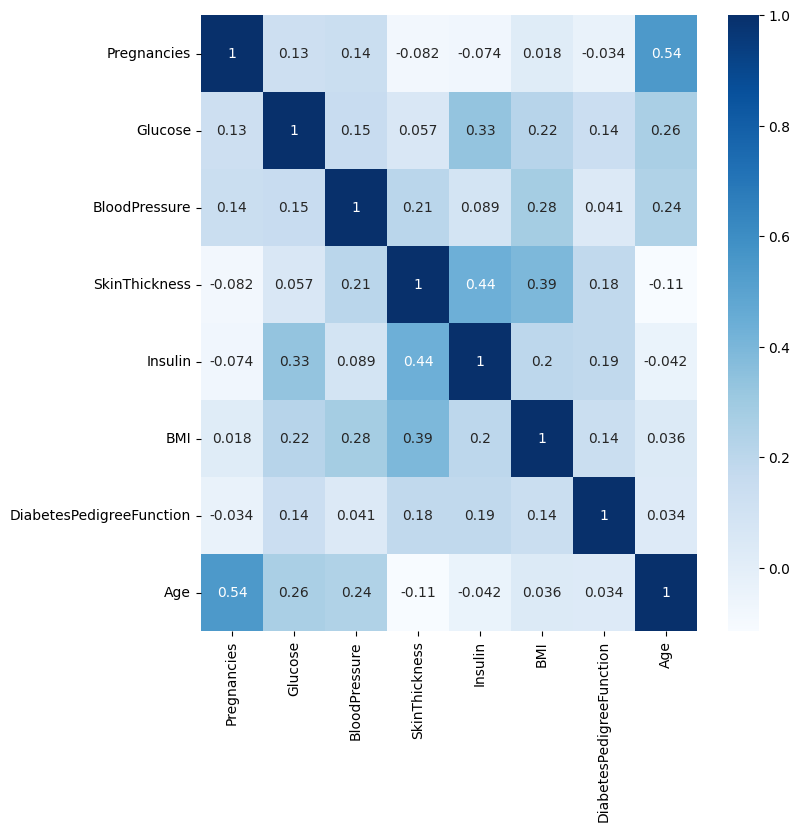

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, cmap="Blues", annot = True)
plt.show()

#### Answer here: 
